# In this example we use the MdB class to access a database of models. 

The dabase is 3MdB, described here: https://sites.google.com/site/mexicanmillionmodels/the-different-projects/hii_chim

In [4]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
import pandas as pd
import pymysql 

In [9]:
# Defining the connection parameters.
import os
host = os.environ['MdB_HOST']
user = os.environ['MdB_USER']
passwd = os.environ['MdB_PASSWD']
db = os.environ['MdB_DB']
db = '3MdB'

In [10]:
co = pymysql.connect(host=host, db=db, user=user, passwd=passwd)
res = pd.read_sql("""SELECT
    12+oxygen AS OH, 
    nitrogen-oxygen AS NO, 
    lumi AS logU, 
    (O_II__3726A + O_II__3729A)/H__1__4861A AS O2, 
    TOTL__4363A/H__1__4861A AS O3_4363, 
    O__3__5007A/H__1__4861A AS O3, 
    N__2__6584A/H__1__6563A AS N2, 
    (S_II__6716A + S_II__6731A)/H__1__4861A AS S2
FROM tab 
WHERE ref = 'DIG_HR'
""", con=co) 

In [11]:
print(len(res))

41327


In [12]:
res

,OH,NO,logU,O2,O3_4363,O3,N2,S2
0,7.8,-0.9,5.00,2.618308,4.748549e-03,0.426190,0.179930,0.836279
1,7.8,-0.7,6.00,2.463984,1.432191e-03,0.149175,0.275243,0.746105
2,8.0,-1.0,6.25,2.642485,1.802446e-04,0.026538,0.184987,1.428638
3,7.7,-0.5,7.50,2.258383,2.818963e-03,0.253828,0.343034,0.440022
4,8.0,-1.0,5.00,3.546639,1.269244e-02,1.192254,0.193837,1.031257
5,7.9,-1.1,5.25,3.120179,6.364315e-03,0.599148,0.134379,0.908914
6,8.3,-0.9,7.00,3.278395,1.672573e-04,0.037799,0.346730,2.047197
7,8.5,-0.4,6.25,2.126128,1.052311e-04,0.052454,1.006040,1.947456
8,8.1,-0.9,4.25,4.331839,2.065086e-02,1.853806,0.305073,1.370130
9,8.3,-0.2,3.50,4.884816,2.095535e-03,0.331748,2.446299,3.077251


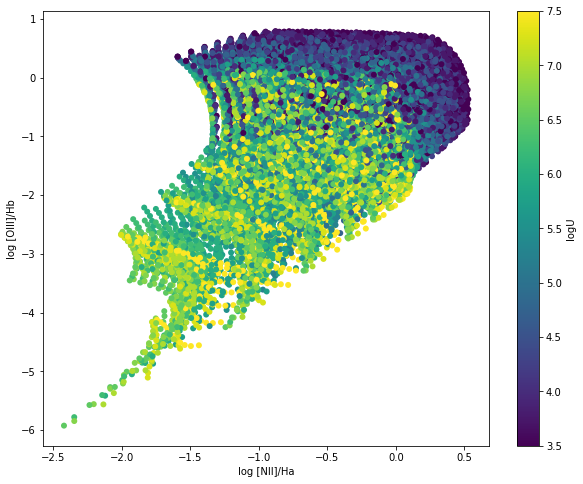

In [17]:
plt.figure(figsize=(10, 8))
plt.scatter(np.log10(res['N2']), np.log10(res['O3']), c=res['logU'], edgecolor = 'none')
plt.xlabel('log [NII]/Ha')
plt.ylabel('log [OIII]/Hb')
cb = plt.colorbar()
cb.set_label('logU')

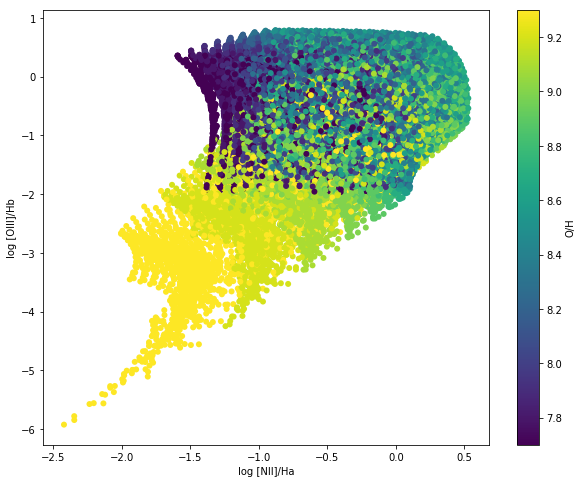

In [18]:
plt.figure(figsize=(10, 8))
plt.scatter(np.log10(res['N2']), np.log10(res['O3']), c=res['OH'], edgecolor = 'none')
plt.xlabel('log [NII]/Ha')
plt.ylabel('log [OIII]/Hb')
cb = plt.colorbar()
cb.set_label('O/H')

In [24]:
res = pd.read_sql("SELECT count(*) as N FROM tab WHERE ref like 'PNe_2014'", con=co)
print("Total number of models with ref='PNe_2014': {}".format(res.N.values[0]))

Total number of models with ref='PNe_2014': 542950


In [25]:
# Query the database
com1 = 'B' # Blackbody
com2 = 'C' # Constant density
com4 = 'S' # Solar metallicity
com5 = 'N' # No dust
com6 = 1 # selected models
res = pd.read_sql("""SELECT
    A_HYDROGEN_vol_1, A_HELIUM_vol_1, A_HELIUM_vol_2, A_CARBON_vol_2, A_NITROGEN_vol_1, A_OXYGEN_vol_1,A_OXYGEN_vol_2,
    A_NEON_vol_2, A_NEON_vol_4, A_SULPHUR_vol_1, A_SULPHUR_vol_2, A_CHLORINE_vol_1, A_CHLORINE_vol_2, A_CHLORINE_vol_3,
    A_ARGON_vol_2, A_ZINC_vol_3, A_IRON_vol_2, A_NICKEL_vol_2, MassFrac, atm1
FROM tab, abion
WHERE tab.ref like 'PNe_2014'
    AND tab.N = abion.N
    AND com1 like '{}%'
    AND com2 like '{}%'
    AND com4 = '{}'
    AND com5 = '{}' 
    AND com6 = {}
    """.format(com1, com2, com4, com5, com6),
                  con=co)

In [26]:
print(len(res))

3021


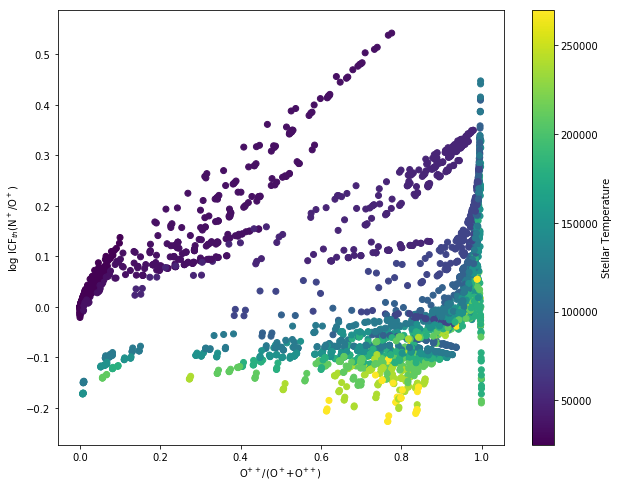

In [28]:
plt.figure(figsize=(10, 8))
plt.scatter(res['A_OXYGEN_vol_2']/(res['A_OXYGEN_vol_1']+res['A_OXYGEN_vol_2']), 
                np.log10(res['A_OXYGEN_vol_1']/res['A_NITROGEN_vol_1']), c=res['atm1'])
plt.xlabel(r'O$^{++}$/(O$^+$+O$^{++}$)')
plt.ylabel(r'log ICF$_{th}$(N$^+$/O$^+$)')
cb = plt.colorbar()
cb.set_label('Stellar Temperature')